# Análise exploratória de dados (EDA) - Saúde Mental dos trabalhadores da área da Saúde

Este dataset  fornece dados sintéticos, porém realistas, projetados para analisar as tendências de saúde mental no local de trabalho em ambientes de saúde. O conjunto de dados contém 5.000 registros, cada um representando um funcionário individual. Este notebook pretende realizar a exploração e a análise dos principais fatores que influenciam os resultados de saúde mental no setor de saúde.
- Dados sinticos retirados de Kaggle. Fonte de dados pública: https://www.kaggle.com/datasets/rivalytics/healthcare-workforce-mental-health-dataset?select=Case+Study+-+Healthcare+WorkForce+Mental+Health.pdf

Visão geral do conjunto de dados:
Colunas: 10
Linhas: 5000

## Parte 1 - Configuração do ambiente

### Instalar bibliotecas

In [ ]:
# !pip install kagglehub
# !pip install pandas
# !pip install matplotlib

In [30]:
#Reading data
import pandas as pd

# Data source
import kagglehub

#For mathematical operations
import numpy as np

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

### Importar base de dados

In [33]:
# Download latest version
path = kagglehub.dataset_download("rivalytics/healthcare-workforce-mental-health-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/vpanjos/.cache/kagglehub/datasets/rivalytics/healthcare-workforce-mental-health-dataset/versions/3


## Parte 2 - Verificação dos dados

In [37]:
raw_csv = pd.read_csv('../Dados/Healthcare_Workforce_Mental_Health_Dataset.csv') 
raw_df = pd.DataFrame(raw_csv)

In [43]:
print(raw_df.info)

<bound method DataFrame.info of      Employee ID             Employee Type           Department  \
0      HCP-00001           Pediatric Nurse           Pediatrics   
1      HCP-00002     Laboratory Technician           Laboratory   
2      HCP-00003         Nursing Assistant      Assisted Living   
3      HCP-00004         Medical Assistant  Outpatient Services   
4      HCP-00005          Registered Nurse     General Medicine   
...          ...                       ...                  ...   
4995   HCP-04996      Radiology Technician            Radiology   
4996   HCP-04997          Registered Nurse     General Medicine   
4997   HCP-04998       Critical Care Nurse                  ICU   
4998   HCP-04999  Healthcare Administrator       Administration   
4999   HCP-05000         Medical Assistant  Outpatient Services   

           Workplace Factor  Stress Level Burnout Frequency  Job Satisfaction  \
0            Heavy Workload             8             Often                 2   
1

### Visão geral do dataset

In [61]:
print("n1. Dataset Linhas, Colunas (Rows, Columns):", raw_df.shape)
print("\n2. Colunas:", raw_df.columns.tolist())
print("\n3. Tipos de dados:\n", raw_df.dtypes)
print("\n4. Valores ausentes por coluna:\n", raw_df.isnull().sum())

n1. Dataset Linhas, Colunas (Rows, Columns): (5000, 10)

2. Colunas: ['Employee ID', 'Employee Type', 'Department', 'Workplace Factor', 'Stress Level', 'Burnout Frequency', 'Job Satisfaction', 'Access to EAPs', 'Mental Health Absences', 'Turnover Intention']

3. Tipos de dados:
 Employee ID               object
Employee Type             object
Department                object
Workplace Factor          object
Stress Level               int64
Burnout Frequency         object
Job Satisfaction           int64
Access to EAPs            object
Mental Health Absences     int64
Turnover Intention        object
dtype: object

4. Valores ausentes por coluna:
 Employee ID               0
Employee Type             0
Department                0
Workplace Factor          0
Stress Level              0
Burnout Frequency         0
Job Satisfaction          0
Access to EAPs            0
Mental Health Absences    0
Turnover Intention        0
dtype: int64


In [75]:
print("\n5. Primeiros Valores:\n")
raw_df.head()


5. Primeiros Valores:



,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No


In [77]:
duplicates = raw_df.duplicated().sum()
print("\n8. Number of Duplicate Rows:", duplicates)


8. Number of Duplicate Rows: 0


In [80]:
# Listar valores únicos para as colunas especificadas
columns_to_check = [
    "Employee Type",
    "Department",
    "Workplace Factor",
    "Burnout Frequency",
    "Access to EAPs",
    "Turnover Intention"
]

for column in columns_to_check:
    unique_values = raw_df[column].unique()
    print(f"{column}: {len(unique_values)} unique values")
    print(f"Valores únicos: {unique_values}\n")

Employee Type: 10 unique values
Valores únicos: ['Pediatric Nurse' 'Laboratory Technician' 'Nursing Assistant'
 'Medical Assistant' 'Registered Nurse' 'Radiology Technician'
 'Healthcare Administrator' 'Critical Care Nurse' 'Physician (Specialist)'
 'Physician (General)']

Department: 10 unique values
Valores únicos: ['Pediatrics' 'Laboratory' 'Assisted Living' 'Outpatient Services'
 'General Medicine' 'Radiology' 'Administration' 'ICU' 'Specialty Care'
 'General Practice']

Workplace Factor: 8 unique values
Valores únicos: ['Heavy Workload' 'Safety Concerns' 'Poor Work Environment'
 'Work-Life Imbalance' 'Career Stagnation' 'Emotional Demands'
 'Unclear Job Expectations' 'Job Insecurity']

Burnout Frequency: 3 unique values
Valores únicos: ['Often' 'Occasionally' 'Never']

Access to EAPs: 2 unique values
Valores únicos: ['Yes' 'No']

Turnover Intention: 2 unique values
Valores únicos: ['No' 'Yes']



### Resumo estastíco

In [65]:
# Resumo estatistico
print("\n6. Análise estatistica por cada coluna:\n", raw_df.describe())
print("\n7. Valores Unicos por cada coluna:\n")
for col in raw_df.select_dtypes(include='object').columns:
    print(f"  {col}: {raw_df[col].nunique()} unique values")


6. Summary Statistics for Numerical Columns:
        Stress Level  Job Satisfaction  Mental Health Absences
count   5000.000000       5000.000000             5000.000000
mean       7.327800          2.202200                7.396200
std        1.407673          1.045722                2.878625
min        4.000000          1.000000                0.000000
25%        7.000000          1.000000                5.000000
50%        8.000000          2.000000                7.000000
75%        8.000000          3.000000                9.000000
max        9.000000          5.000000               19.000000

7. Unique Values in Each Categorical Column:

  Employee ID: 5000 unique values
  Employee Type: 10 unique values
  Department: 10 unique values
  Workplace Factor: 8 unique values
  Burnout Frequency: 3 unique values
  Access to EAPs: 2 unique values
  Turnover Intention: 2 unique values


## Parte 3 - Análise exploratória dos dados

**Insights com base nas perguntas de negócio**

### 1. Quais são os fatores do local de trabalho que contribuem para altos níveis de estresse?

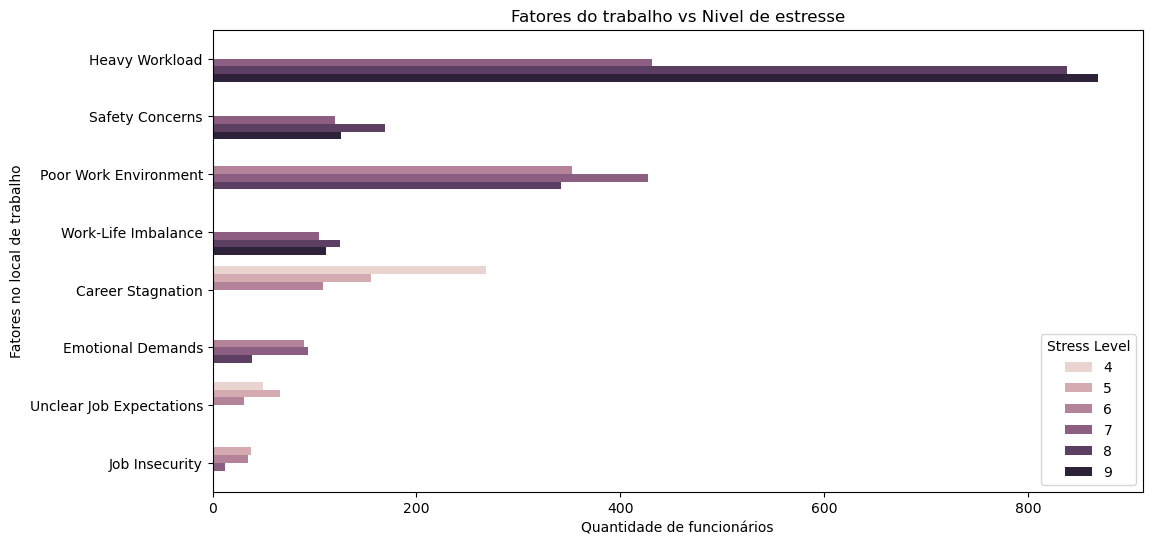

In [124]:
# This give the height and width dimensions
plt.figure(figsize=(12,6))

#Plot a graph with stress an dependent variable and workplace factors as independent variables.
#Hue provide the colour key for the bars
sns.countplot(y=raw_df["Workplace Factor"], hue=raw_df["Stress Level"])

#This gives a title to the graph
plt.title("Fatores do trabalho vs Nivel de estresse")

#This assigns the label of the y axis of the graph
plt.ylabel("Fatores no local de trabalho")

#This assigns the label of the x axis of the graph
plt.xlabel("Quantidade de funcionários")

#This displays the graph
plt.show()



### 2. Como a frequência do esgotamento afeta a satisfação no trabalho ?

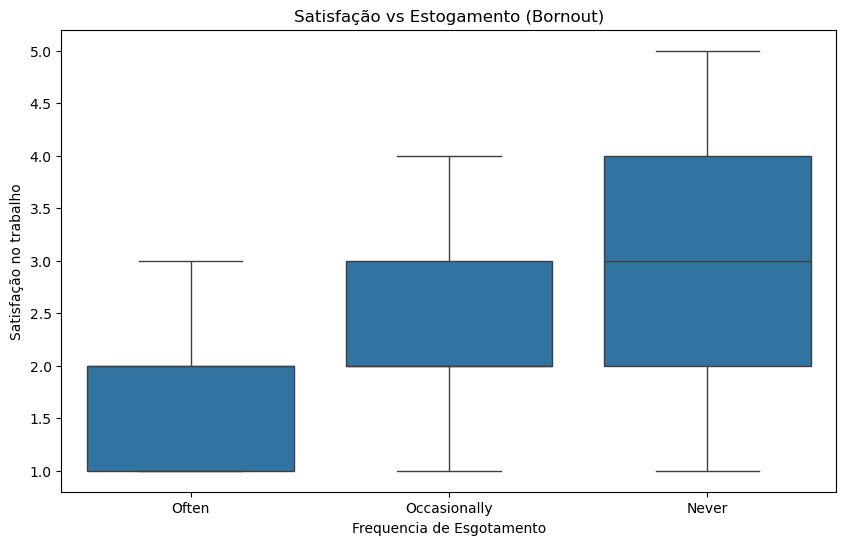

In [122]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Burnout Frequency', y='Job Satisfaction', data=raw_df)
plt.title('Satisfação vs Estogamento (Bornout)')
plt.xlabel('Frequencia de Esgotamento')
plt.ylabel('Satisfação no trabalho')
plt.show()

### 3. Quais as funções com mais propensão ao turnover/rotatividade ? 

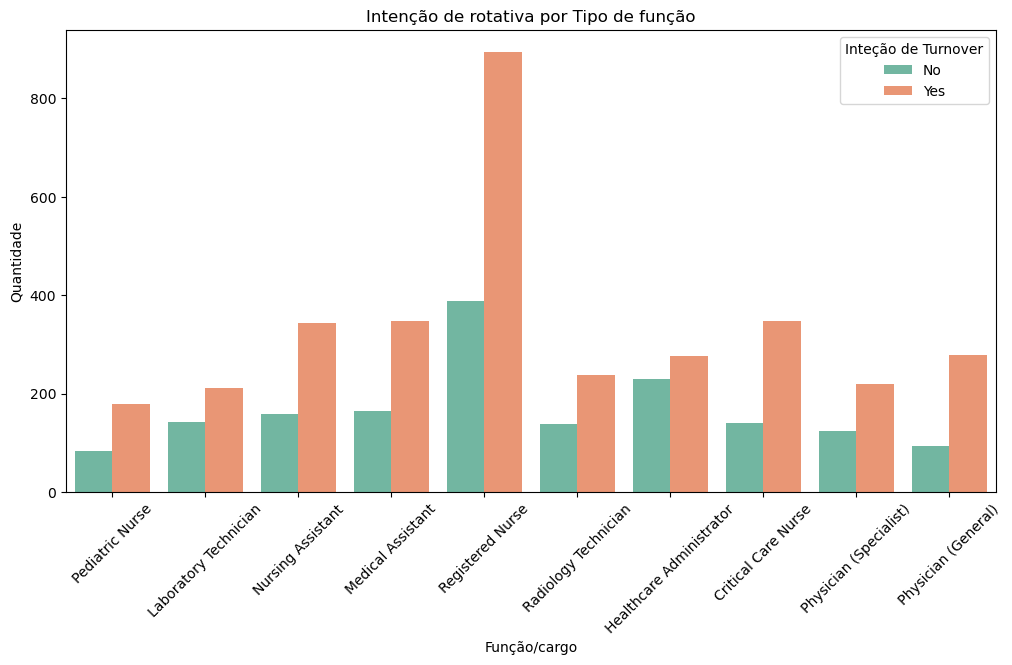

In [129]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Employee Type', hue='Turnover Intention', data=raw_df, palette='Set2')
plt.title('Intenção de rotativa por Tipo de função')
plt.xticks(rotation=45)
plt.xlabel('Função/cargo')
plt.ylabel('Quantidade')
plt.legend(title='Inteção de Turnover')
plt.show()



### 4. Como o nivel de estresse contribui para mais ausências por motivo de saúde mental?

<Axes: title={'center': 'Ausência por motivo de saúde mental por nível de estresse'}, xlabel='Stress Level', ylabel='Mental Health Absences'>

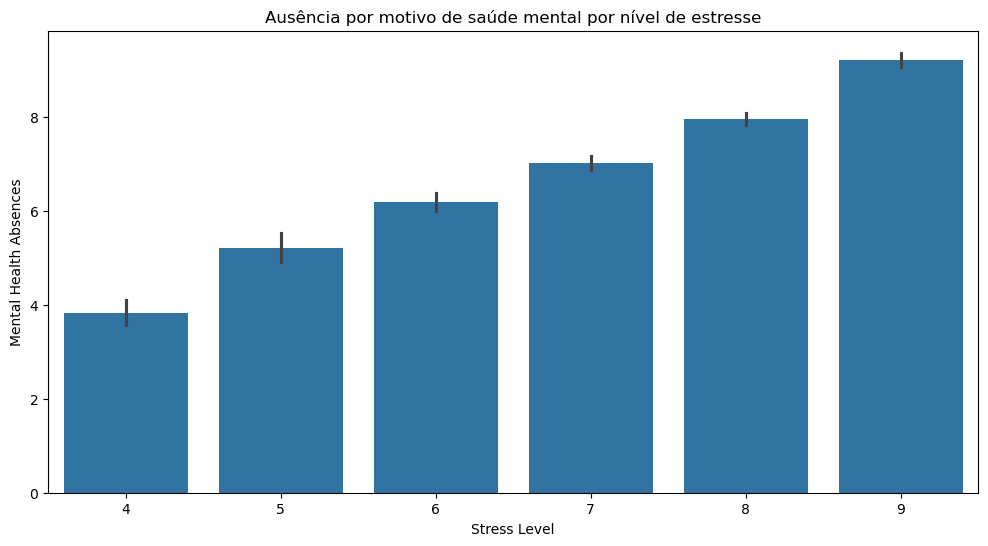

In [149]:
plt.figure(figsize=(12,6))
plt.title('Ausência por motivo de saúde mental por nível de estresse')
sns.barplot(x=raw_df["Stress Level"], y= raw_df["Mental Health Absences"])

### 5. Os funcionários com acesso aos Programas de Assistência ao Funcionário (EAPs) mostram menores taxas de absenteísmo.

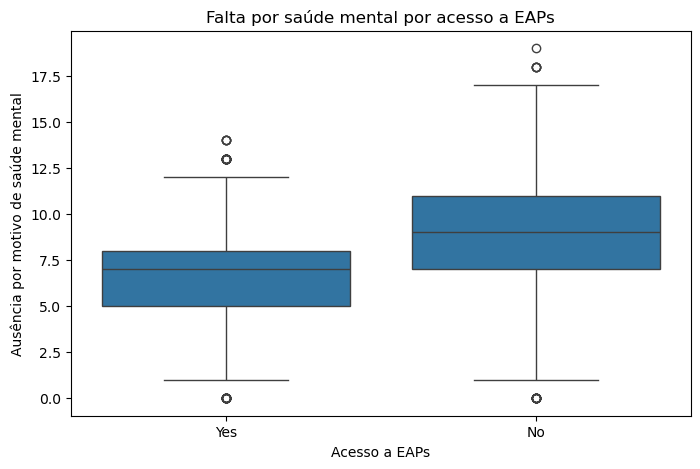

In [156]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Access to EAPs', y='Mental Health Absences', data=raw_df)
plt.title('Falta por saúde mental por acesso a EAPs')
plt.xlabel('Acesso a EAPs')
plt.ylabel('Ausência por motivo de saúde mental')
plt.show()


### Correlação heatmap

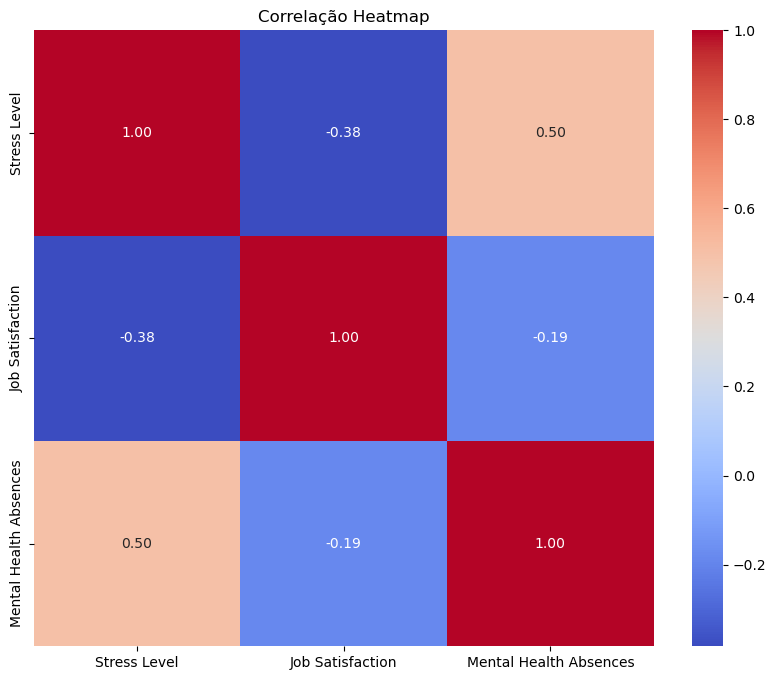

In [181]:
#heatmap
numeric_df = raw_df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação Heatmap')
plt.show()

